In [17]:
import matplotlib.pyplot as plt
import pandas as pd

df_100 = pd.read_csv('100x100/02-05_22h-00.csv')
df_50 = pd.read_csv('50x50/03-05_08h-17.csv')
df_25 = pd.read_csv('25x25/02-05_15h-23.csv')
df_10 = pd.read_csv('10x10/02-05_14h-56.csv')
df = pd.concat([df_100, df_50, df_25, df_10]).drop(columns=['path_found'])
# Convert board size (100, 100) to 100
df['board_size'] = df['board_size'].apply(lambda x: int(x.split(',')[0].split('(')[1]))
df['board_size'] = df['board_size'].astype(int)
df['elapsed_time'] = df['elapsed_time'].astype(float)
df = df.set_index('board_size', drop=True).sort_index()
print(len(df[df['total_cost'] > 20000]))
df = df[df['total_cost'] < 20000]
df

130


,algorithm,elapsed_time,steps,total_cost
board_size,,,,
10,AStar,0.077298,67,33.0
10,DFS,0.027495,30,31.0
10,DFS,0.022177,20,37.0
10,DFS,0.020233,20,37.0
10,DFS,0.023232,19,39.0
...,...,...,...,...
100,GBFS,2.409403,208,361.0
100,GBFS,2.497501,207,367.0
100,GBFS,14.971311,1254,627.0


In [18]:
df['algorithm'].unique()

array(['AStar', 'DFS', 'Dijkstra', 'BFS', 'GBFS'], dtype=object)

In [19]:
df_bfs = df[df['algorithm'] == 'BFS'].drop(columns=['algorithm'])
df_dfs = df[df['algorithm'] == 'DFS'].drop(columns=['algorithm'])
df_djikstra = df[df['algorithm'] == 'Dijkstra'].drop(columns=['algorithm'])
df_a_star = df[df['algorithm'] == 'AStar'].drop(columns=['algorithm'])
df_gbfs = df[df['algorithm'] == 'GBFS'].drop(columns=['algorithm'])

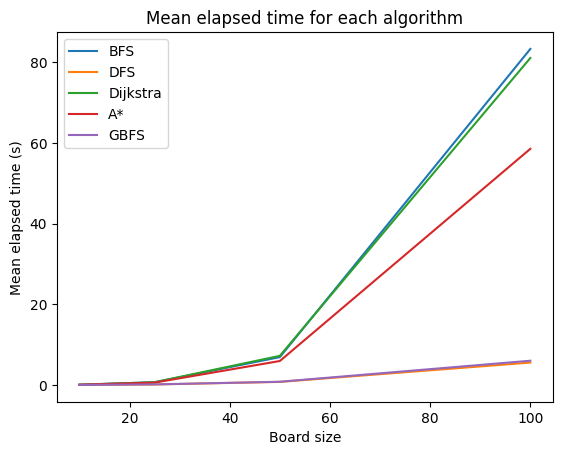

In [20]:
fig, ax = plt.subplots()
df_bfs.groupby('board_size').mean().plot(y='elapsed_time', ax=ax, label='BFS')
df_dfs.groupby('board_size').mean().plot(y='elapsed_time', ax=ax, label='DFS')
df_djikstra.groupby('board_size').mean().plot(y='elapsed_time', ax=ax, label='Dijkstra')
df_a_star.groupby('board_size').mean().plot(y='elapsed_time', ax=ax, label='A*')
df_gbfs.groupby('board_size').mean().plot(y='elapsed_time', ax=ax, label='GBFS')
plt.ylabel('Mean elapsed time (s)')
plt.xlabel('Board size')
plt.title('Mean elapsed time for each algorithm')
plt.show()

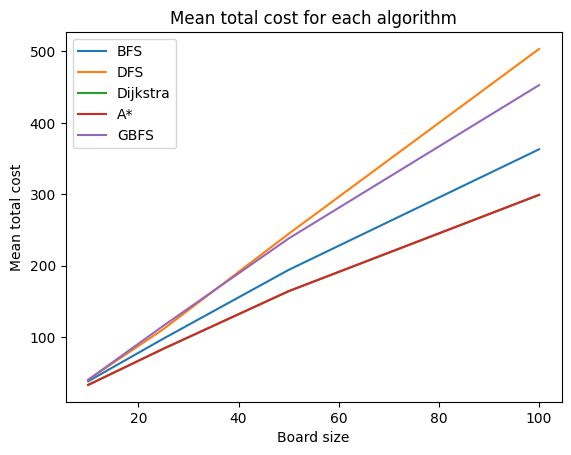

In [21]:
fig, ax = plt.subplots()
df_bfs.groupby('board_size').mean().plot(y='total_cost', ax=ax, label='BFS')
df_dfs.groupby('board_size').mean().plot(y='total_cost', ax=ax, label='DFS')
df_djikstra.groupby('board_size').mean().plot(y='total_cost', ax=ax, label='Dijkstra')
df_a_star.groupby('board_size').mean().plot(y='total_cost', ax=ax, label='A*')
df_gbfs.groupby('board_size').mean().plot(y='total_cost', ax=ax, label='GBFS')
plt.ylabel('Mean total cost')
plt.xlabel('Board size')
plt.title('Mean total cost for each algorithm')
plt.show()

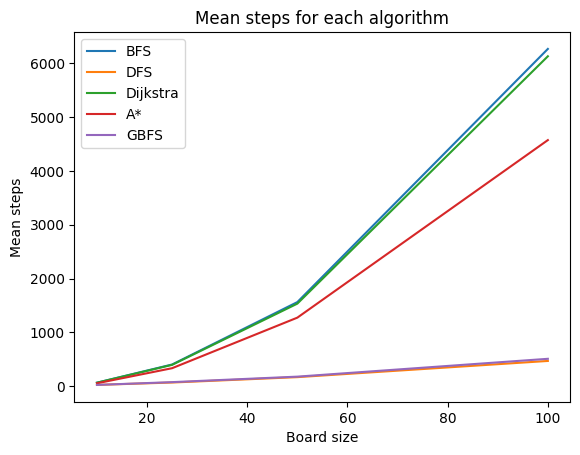

In [22]:
fig, ax = plt.subplots()
df_bfs.groupby('board_size').mean().plot(y='steps', ax=ax, label='BFS')
df_dfs.groupby('board_size').mean().plot(y='steps', ax=ax, label='DFS')
df_djikstra.groupby('board_size').mean().plot(y='steps', ax=ax, label='Dijkstra')
df_a_star.groupby('board_size').mean().plot(y='steps', ax=ax, label='A*')
df_gbfs.groupby('board_size').mean().plot(y='steps', ax=ax, label='GBFS')
plt.ylabel('Mean steps')
plt.xlabel('Board size')
plt.title('Mean steps for each algorithm')
plt.show()

In [23]:
df_bfs.groupby('board_size').describe()

elapsed_time                                              \
                  count       mean        std        min        25%   
board_size                                                            
10                 81.0   0.078835   0.017221   0.034771   0.066772   
25                 97.0   0.694931   0.129061   0.390408   0.611157   
50                 96.0   6.916974   1.644337   3.531551   5.583484   
100               100.0  83.270086  18.474825  39.357006  69.767989   

                                              steps               ...          \
                  50%        75%         max  count         mean  ...     75%   
board_size                                                        ...           
10           0.080507   0.088959    0.132111   81.0    64.888889  ...    75.0   
25           0.706270   0.789792    0.965549   97.0   402.546392  ...   465.0   
50           7.049844   8.216794    9.986885   96.0  1562.562500  ...  1810.5   
100         85.888386  95.830713  122.639165  100.0  6266.680000  ...  7097.0   

                   total_cost                                               \
               max      count        mean        std    min     25%    50%   
board_size                                                                   
10            86.0       81.0   37.925926   6.804002   22.0   34.00   38.0   
25           564.0       97.0   97.628866  15.868811   68.0   87.00   97.0   
50          2248.0       96.0  193.927083  30.008155  132.0  173.75  195.0   
100         8971.0      100.0  362.940000  53.509335  262.0  324.00  361.0   

                           
               75%    max  
board_size                 
10           43.00   59.0  
25          107.00  156.0  
50          212.25  265.0  
100         398.75  495.0  

[4 rows x 24 columns]

In [24]:
df_dfs.groupby('board_size').describe()

elapsed_time                                                    \
                  count      mean       std       min       25%       50%   
board_size                                                                  
10                 81.0  0.026403  0.008885  0.016288  0.020726  0.023232   
25                 97.0  0.138172  0.056227  0.096276  0.105273  0.119800   
50                 96.0  0.775927  0.503077  0.445253  0.488419  0.564041   
100               100.0  5.565189  6.121732  2.287621  2.561987  3.035060   

                                 steps              ...                  \
                 75%        max  count        mean  ...     75%     max   
board_size                                          ...                   
10          0.030179   0.065481   81.0   23.716049  ...   25.00    47.0   
25          0.149985   0.472787   97.0   67.793814  ...   71.00   271.0   
50          0.787783   3.050957   96.0  167.739583  ...  169.75   674.0   
100         5.390399  34.614330  100.0  468.780000  ...  463.25  2762.0   

           total_cost                                                        \
                count        mean         std    min     25%    50%     75%   
board_size                                                                    
10               81.0   40.086420    8.011238   24.0   35.00   39.0   45.00   
25               97.0  110.948454   26.734564   66.0   91.00  109.0  124.00   
50               96.0  244.437500   79.708919  139.0  195.75  223.0  276.00   
100             100.0  503.510000  219.909830  234.0  370.75  442.5  546.25   

                    
               max  
board_size          
10            62.0  
25           196.0  
50           639.0  
100         1570.0  

[4 rows x 24 columns]

In [25]:
df_djikstra.groupby('board_size').describe()

elapsed_time                                              \
                  count       mean        std        min        25%   
board_size                                                            
10                 81.0   0.076226   0.016683   0.040217   0.063657   
25                 97.0   0.686352   0.132530   0.403711   0.597629   
50                 96.0   7.231928   1.628548   3.672489   6.088852   
100               100.0  81.032210  18.127180  36.972174  67.255842   

                                              steps               ...          \
                  50%        75%         max  count         mean  ...     75%   
board_size                                                        ...           
10           0.077442   0.086217    0.130158   81.0    64.333333  ...    74.0   
25           0.695357   0.796376    0.993155   97.0   396.329897  ...   457.0   
50           7.190758   8.488624   11.018427   96.0  1533.718750  ...  1783.0   
100         82.588120  92.546579  124.558938  100.0  6129.820000  ...  6903.5   

                   total_cost                                               \
               max      count        mean        std    min     25%    50%   
board_size                                                                   
10            85.0       81.0   32.827160   6.781943   20.0   29.00   33.0   
25           564.0       97.0   83.453608  16.673970   52.0   73.00   82.0   
50          2248.0       96.0  164.083333  29.556606  102.0  142.00  164.0   
100         8971.0      100.0  298.900000  58.568875  199.0  258.75  291.0   

                           
               75%    max  
board_size                 
10           36.00   59.0  
25           93.00  156.0  
50          185.25  234.0  
100         333.00  493.0  

[4 rows x 24 columns]

In [26]:
df_a_star.groupby('board_size').describe()

elapsed_time                                              \
                  count       mean        std        min        25%   
board_size                                                            
10                 81.0   0.066122   0.019057   0.028365   0.051409   
25                 97.0   0.602332   0.147118   0.318950   0.479906   
50                 96.0   5.951015   1.647412   2.483203   4.828418   
100               100.0  58.524410  20.489208  22.108104  41.935869   

                                              steps               ...          \
                  50%        75%         max  count         mean  ...     75%   
board_size                                                        ...           
10           0.065704   0.078173    0.108975   81.0    53.864198  ...    65.0   
25           0.602731   0.720749    0.964365   97.0   333.969072  ...   400.0   
50           5.760493   7.047777    9.830306   96.0  1273.437500  ...  1495.5   
100         56.091829  71.947509  111.908490  100.0  4572.580000  ...  5536.0   

                   total_cost                                              \
               max      count        mean        std    min    25%    50%   
board_size                                                                  
10            79.0       81.0   32.827160   6.781943   20.0   29.0   33.0   
25           547.0       97.0   83.463918  16.686485   52.0   73.0   82.0   
50          2031.0       96.0  164.135417  29.621692  102.0  142.0  164.0   
100         8177.0      100.0  299.230000  58.392413  199.0  259.0  291.0   

                           
               75%    max  
board_size                 
10           36.00   59.0  
25           93.00  156.0  
50          185.25  234.0  
100         333.00  493.0  

[4 rows x 24 columns]

In [27]:
df_gbfs.groupby('board_size').describe()

elapsed_time                                                    \
                  count      mean       std       min       25%       50%   
board_size                                                                  
10                 81.0  0.027715  0.007451  0.017526  0.023087  0.025665   
25                 97.0  0.150874  0.064593  0.096274  0.108225  0.125069   
50                 96.0  0.813856  0.487241  0.451648  0.496462  0.598567   
100               100.0  6.019018  6.335763  2.289340  2.625307  3.380463   

                                 steps              ...                  \
                 75%        max  count        mean  ...     75%     max   
board_size                                          ...                   
10          0.030217   0.056958   81.0   23.246914  ...   25.00    52.0   
25          0.171879   0.476385   97.0   74.969072  ...   84.00   266.0   
50          0.948198   3.284066   96.0  177.125000  ...  205.25   730.0   
100         6.187774  43.035185  100.0  508.590000  ...  529.00  3482.0   

           total_cost                                                       \
                count        mean         std    min     25%    50%    75%   
board_size                                                                   
10               81.0   40.049383    7.589304   24.0   35.00   40.0   44.0   
25               97.0  115.659794   26.431076   76.0   99.00  112.0  129.0   
50               96.0  237.895833   59.486306  132.0  200.00  231.5  260.0   
100             100.0  452.860000  110.152238  273.0  376.75  442.5  507.5   

                   
              max  
board_size         
10           66.0  
25          195.0  
50          416.0  
100         788.0  

[4 rows x 24 columns]

In [33]:
df_10

,algorithm,board_size,elapsed_time,steps,path_found,total_cost
0,BFS,"(10, 10)",0.101912,76,True,44.0
1,BFS,"(10, 10)",0.104181,79,True,42.0
2,BFS,"(10, 10)",0.080507,62,True,45.0
3,BFS,"(10, 10)",0.082429,65,True,43.0
4,BFS,"(10, 10)",0.080873,66,True,39.0
...,...,...,...,...,...,...
495,AStar,"(10, 10)",0.094743,74,True,40.0
496,AStar,"(10, 10)",0.056015,51,True,35.0
497,AStar,"(10, 10)",0.070143,61,True,23.0
498,AStar,"(10, 10)",0.045043,42,True,42.0


In [31]:
df_10[df_10['total_cost'] < 20000]['elapsed_time'].describe()

count    405.000000
mean       0.055060
std        0.027471
min        0.016288
25%        0.027021
50%        0.055283
75%        0.079086
max        0.132111
Name: elapsed_time, dtype: float64

In [32]:
df_10[df_10['total_cost'] < 20000]['elapsed_time'].describe()

count    405.000000
mean       0.055060
std        0.027471
min        0.016288
25%        0.027021
50%        0.055283
75%        0.079086
max        0.132111
Name: elapsed_time, dtype: float64

In [36]:
.value_counts()

elapsed_time  steps  total_cost
-81.987858    -5657  -51.0         1
-0.019138     -30     10.0         1
-0.012509     -23     6.0          1
-0.013260     -24     32.0         1
-0.014787     -37     15.0         1
                                  ..
-1.491386     -314    21.0         1
-1.579502     -307   -58.0         1
-1.610784     -109    150.0        1
-1.656623     -291   -60.0         1
 38.574503     2796  -1.0          1
Name: count, Length: 374, dtype: int64